In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#data about samples for test
#path_dclean = r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\df_final_experiment_web_data_demo.csv"
#data_cleaned_total=pd.read_csv(path_dclean)
#demographical data
path_demo=r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\clean_df_final_demo.csv"
data_demo=pd.read_csv(path_demo,low_memory=False)

In [3]:
data_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

EDA: population caracteristic

In [4]:
data_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control


In [53]:
data_demo.shape

(70594, 10)

In [54]:
data_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation'],
      dtype='object')

In [57]:
#correlation matrix considering genders removing gender for correlation matrix
# List of columns to encode
category = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_selected_columns = data_demo[category].copy()

# Calculate the correlation matrix
correlation_matrix = df_selected_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  num_accts  \
clnt_tenure_yr          1.000000          0.998936  0.309372   0.152324   
clnt_tenure_mnth        0.998936          1.000000  0.309675   0.152028   
clnt_age                0.309372          0.309675  1.000000  -0.017689   
num_accts               0.152324          0.152028 -0.017689   1.000000   
bal                     0.203618          0.202881  0.209549   0.268746   
calls_6_mnth            0.049921          0.047897  0.026734   0.235405   
logons_6_mnth           0.048521          0.046694  0.084683   0.224409   

                       bal  calls_6_mnth  logons_6_mnth  
clnt_tenure_yr    0.203618      0.049921       0.048521  
clnt_tenure_mnth  0.202881      0.047897       0.046694  
clnt_age          0.209549      0.026734       0.084683  
num_accts         0.268746      0.235405       0.224409  
bal               1.000000      0.162167       0.165384  
calls_6_mnth      0.162167      1.000000       0.82

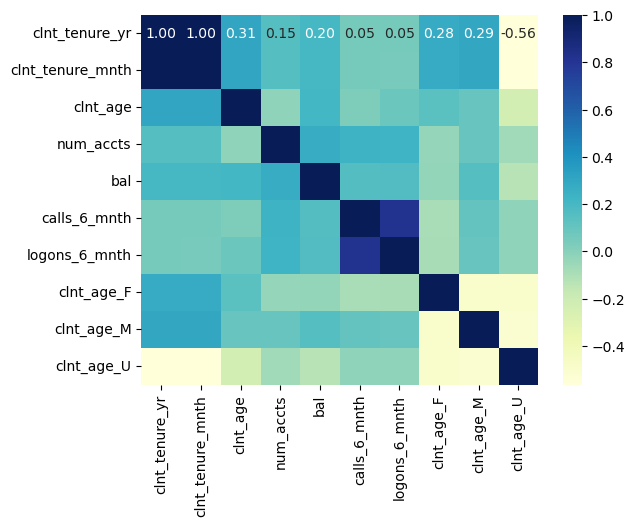

In [56]:
#Code that need adapting according to OS/version of packages
#sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt="d");
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [54]:
#modify df to consider 'clnt_age' ,'clnt_tenure_yr' and num_accts  as categorical variables
#Age column
data_demo = data_demo.assign(clnt_age_cat=pd.cut(data_demo['clnt_age'], bins=[0, 18, 25, 35, 45, 55, 65,75, 100], labels=['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74','over75']))
#Tenure column
data_demo = data_demo.assign(clnt_tenure_yr_cat=pd.cut(data_demo['clnt_tenure_yr'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']))
#Number of account
data_demo = data_demo.assign(num_accts_cat=pd.cut(data_demo['clnt_tenure_yr'], bins=8,labels=[1,2,3,4,5,6,7,8]))

In [55]:
data_demo.dtypes

client_id                int64
clnt_tenure_yr           int64
clnt_tenure_mnth         int64
clnt_age               float64
gendr                   object
num_accts                int64
bal                    float64
calls_6_mnth             int64
logons_6_mnth            int64
Variation               object
clnt_age_cat          category
clnt_tenure_yr_cat    category
num_accts_cat         category
dtype: object

In [28]:
data_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat
0,836976,6,73,60.5,U,2,45105.30,6,9,Test,55-64,5-9
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control,55-64,5-9
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test,25-34,0-4
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test,45-54,15-19
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control,25-34,10-14


In [31]:
data_demo.describe(include="all")

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594,70594.000000,7.059400e+04,70594.000000,70594.000000,50487,70594,70594
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,7,12
top,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test,25-34,5-9
freq,NaN,NaN,NaN,NaN,24125,NaN,NaN,NaN,NaN,26961,14551,22223
mean,5.005026e+06,12.053007,150.659999,46.442240,NaN,2.255532,1.474467e+05,3.382469,5.566720,NaN,NaN,NaN
std,2.877289e+06,6.871850,82.090264,15.591273,NaN,0.535000,3.015106e+05,2.236595,2.353296,NaN,NaN,NaN
min,1.690000e+02,2.000000,33.000000,13.500000,NaN,1.000000,1.378942e+04,0.000000,1.000000,NaN,NaN,NaN
25%,2.519543e+06,6.000000,82.000000,32.500000,NaN,2.000000,3.734660e+04,1.000000,4.000000,NaN,NaN,NaN
50%,5.016974e+06,11.000000,136.000000,47.000000,NaN,2.000000,6.333459e+04,3.000000,5.000000,NaN,NaN,NaN
75%,7.483074e+06,16.000000,192.000000,59.000000,NaN,2.000000,1.375461e+05,6.000000,7.000000,NaN,NaN,NaN


In [10]:
#stat calculations for numerical variables
def calc_stat(df, columns):
    # Initialize an empty list to store the stats for each column
    stats_list = []
    
    # Loop through each column in the list
    for column in columns:
        # Calculate the required statistics
        mean_column = df[column].mean()
        median_column = df[column].median()
        mode_column = df[column].mode().iloc[0]
        var_column = df[column].var()
        std_column = df[column].std()
        max_column = df[column].max()
        min_column = df[column].min()
        range_column = df[column].max() - df[column].min()
        quantiles_column = df[column].quantile([0.25, 0.5, 0.75]).to_list()
        
        # Append the results to the stats_list
        stats_list.append({
            'Column': column,
            'Mean': mean_column,
            'Median': median_column,
            'Mode': mode_column,
            'Variance': var_column,
            'Standard Deviation': std_column,
            'Maximal': max_column,
            'Minimal': min_column,          
            'Range': range_column,
            '25th Percentile': quantiles_column[0],
            '50th Percentile': quantiles_column[1],
            '75th Percentile': quantiles_column[2]
        })

    # Convert the stats_list to a DataFrame for better presentation
    stats_df = pd.DataFrame(stats_list)
    
    return stats_df

In [37]:
calc_stat(data_demo,['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'])

,Column,Mean,Median,Mode,Variance,Standard Deviation,Maximal,Minimal,Range,25th Percentile,50th Percentile,75th Percentile
0,clnt_tenure_yr,12.050560,11.0,6.00,4.724133e+01,6.873233,62.00,0.00,62.00,6.000,11.0,16.000
1,clnt_tenure_mnth,150.629495,136.0,58.00,6.741908e+03,82.109121,749.00,0.00,749.00,82.000,136.0,192.000
2,clnt_age,46.442240,47.0,58.50,2.430878e+02,15.591273,96.00,13.50,82.50,32.500,47.0,59.000
3,num_accts,2.255081,2.0,2.00,2.871734e-01,0.535886,8.00,0.00,8.00,2.000,2.0,2.000
4,bal,147445.240641,63332.9,31188.62,9.090750e+10,301508.706531,16320040.15,13789.42,16306250.73,37346.835,63332.9,137544.905
5,calls_6_mnth,3.381807,3.0,6.00,5.003567e+00,2.236865,7.00,0.00,7.00,1.000,3.0,6.000
6,logons_6_mnth,5.565636,5.0,9.00,5.542999e+00,2.354357,9.00,0.00,9.00,4.000,5.0,7.000


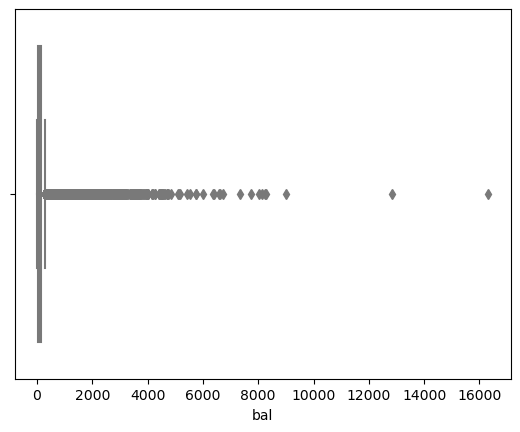

In [36]:
#plot bal (fig avec outliners
sns.boxplot(x = data_demo['bal']/1000, color="lightblue");


In [56]:
#Dropping outliners for bal
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers
    
data_series =data_demo ['bal']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
#print(outliers)
data_demo.iloc[~outliers.index,:] # ~ = NOT

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat,num_accts_cat
70586,2690705,15,181,53.0,F,2,24910.52,3,3,NaN,45-54,10-14,2
70585,6746156,8,106,32.0,F,2,19019.55,1,1,NaN,25-34,5-9,1
70584,4851159,6,79,60.0,U,2,74501.76,4,4,NaN,55-64,5-9,1
70572,424250,14,177,56.5,M,2,135143.26,4,4,NaN,55-64,10-14,2
70556,3987156,4,53,53.0,U,2,177851.22,7,7,NaN,45-54,0-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2892152,4,58,36.0,U,2,46815.48,5,8,Test,35-44,0-4,1
13,2214073,16,193,62.5,M,3,136818.03,6,9,Test,55-64,15-19,2
10,8368822,8,100,34.5,U,2,75578.54,0,3,Control,25-34,5-9,1
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control,25-34,10-14,2


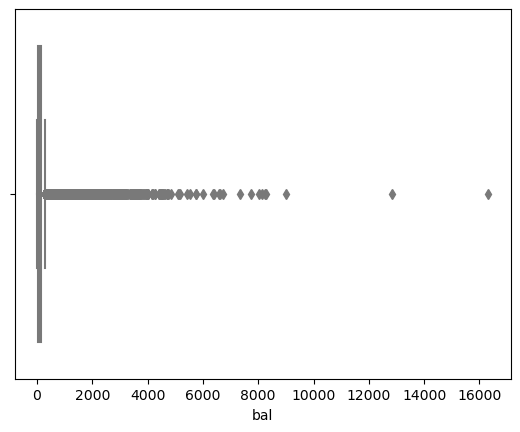

In [57]:
#plot bal (fig sans outliners)
sns.boxplot(x = data_demo['bal']/1000, color="lightblue");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


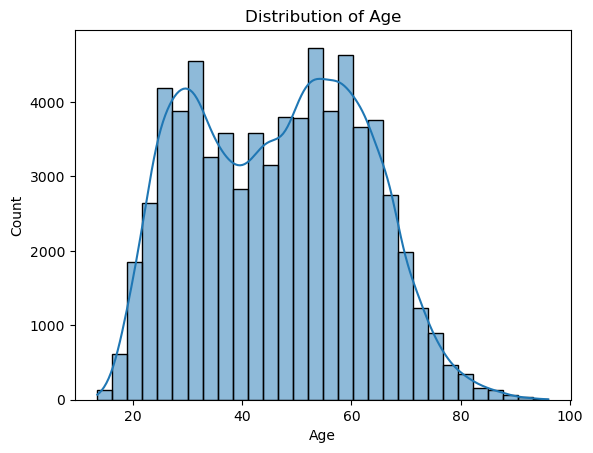

In [26]:
# Plot a histogram of a numerical variable : age by 30 bins
sns.histplot(data=data_demo, x='clnt_age',  bins=30,kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


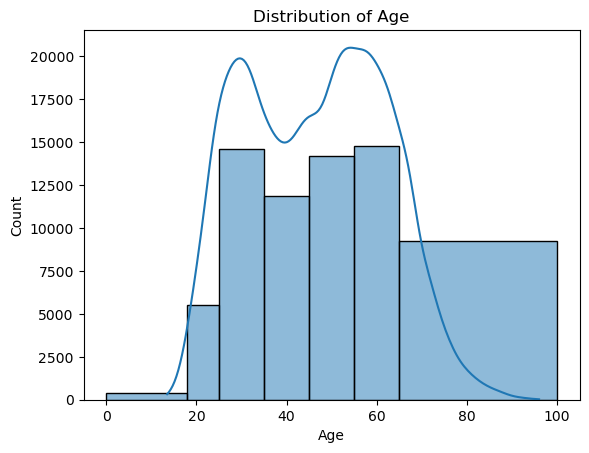

In [27]:
# Plot a histogram of a numerical variable : age by logical group
sns.histplot(data=data_demo, x='clnt_age',  bins=[0, 18, 25, 35, 45, 55, 65, 100],kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


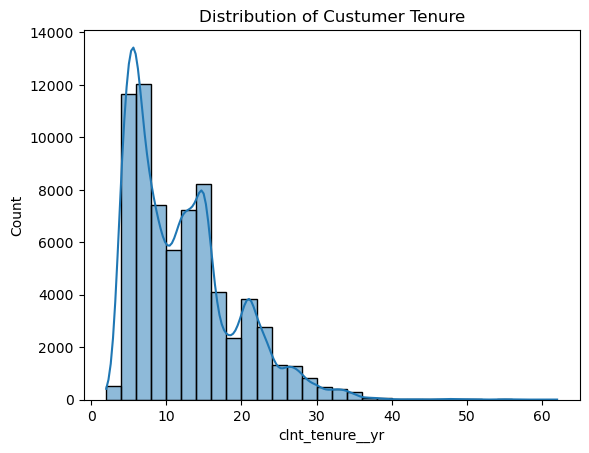

In [64]:
# Plot a histogram of clnt_tenure__yr
sns.histplot(data=data_demo, x='clnt_tenure_yr', bins=30,kde=True)

# Add labels and title
plt.xlabel('clnt_tenure__yr')
plt.ylabel('Count')
plt.title('Distribution of Custumer Tenure')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


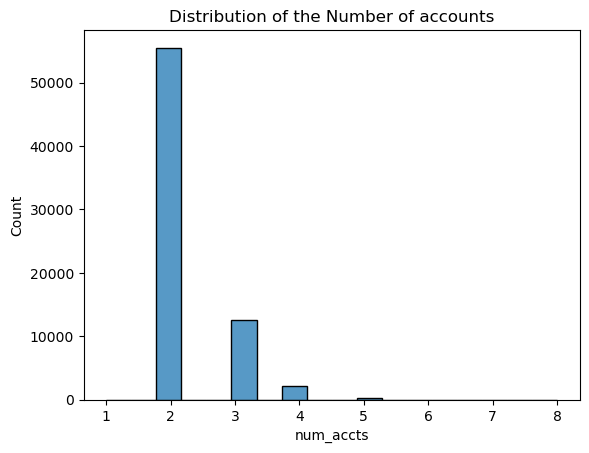

In [24]:
# Plot a histogram of num_accts
sns.histplot(data=data_demo, x='num_accts')

# Add labels and title
plt.xlabel('num_accts')
plt.ylabel('Count')
plt.title('Distribution of the Number of accounts')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


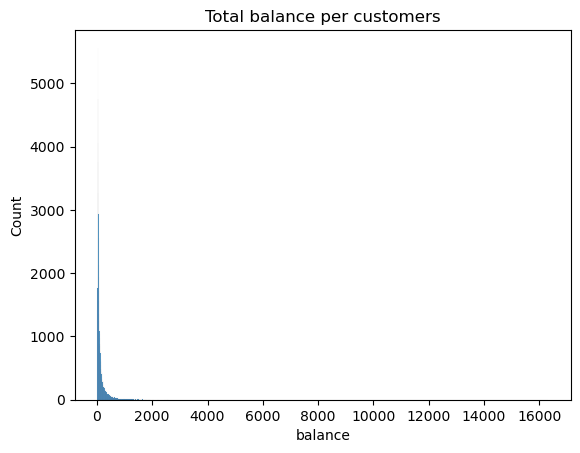

In [35]:
sns.histplot(data=data_demo, x=(data_demo['bal']/1000))

# Add labels and title
plt.xlabel('balance')
plt.ylabel('Count')
plt.title('Total balance per customers')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


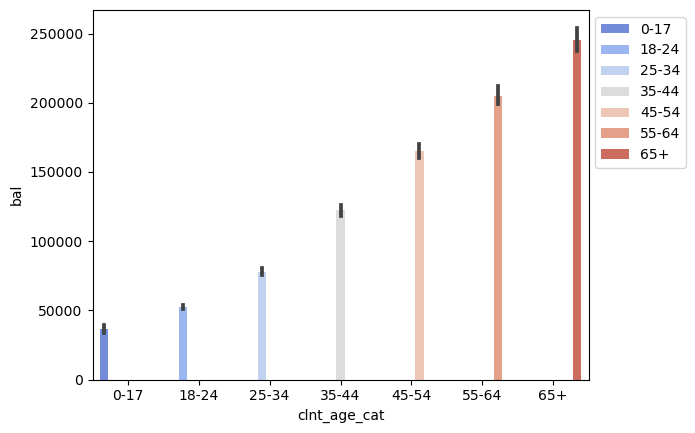

In [43]:
#plot val  by age
sns.barplot(data=data_demo, x='clnt_age_cat', y='bal', palette="coolwarm", hue='clnt_age_cat');
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [60]:
#plot number of accounts vs val
sns.barplot(data=data_demo, x=num_accts_cat, y='bal', palette="coolwarm", hue='num_accts');
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

NameError: name 'num_accts_cat' is not defined

In [ ]:
#Function to perform chi2tests between columns
def chi2_test(df, col1, col2):
    # Create a contingency table between the two specified columns
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column1': [col1],
        'column2': [col2],
        'p-value': [p],
        'statistic': [chi2],
        'dof': [dof]
    }

In [23]:
#Function pour faire des test chi2 entre groupes
from scipy.stats import chi2_contingency  
  
def Qui2test(df, columns):  
   results = []  
   for col in columns:  
      contingency_table = pd.crosstab(df[col], df['Variation'])  
      chi2, p, dof, expected = chi2_contingency(contingency_table)  
      results.append({'column': col, 'p-value': p, 'statistic': chi2})  
   return results

In [43]:
Tests=Qui2test(data_cleaned_total,category)
pd.DataFrame(Tests)

,column,p-value,statistic
0,clnt_tenure_yr,5.879024e-59,422.122157
1,clnt_tenure_mnth,0.000000e+00,4006.500842
2,clnt_age,0.000000e+00,2466.923170
3,gendr,1.332217e-12,54.688354
4,num_accts,4.351324e-27,140.322162
5,bal,0.000000e+00,316115.401960
6,calls_6_mnth,1.802135e-36,181.293901
7,logons_6_mnth,1.727711e-33,170.769638


In [ ]:
#créer meme fonction pour t-test

In [ ]:
# List of columns to plot (wrong df name, copy passte from previous notebook)
columns_to_plot = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Plot histograms for numerical columns and a count plot for 'gendr' keeping unknown
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    if column == 'gendr':
        sns.countplot(x=clean_df_final_demo[column])
        plt.title(f'Count Plot of {column}')
    else:
        sns.histplot(clean_df_final_demo[column], kde=True)
        plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

CLT & Hypotheisis testing

In [61]:
#sample creation
# Creating a filtered dataframe for value "Test" in column "Variation"
df_test =data_demo[data_demo['Variation'] == 'Test'].copy()

# Creating a filtered dataframe for value "Control" in column "Variation"
df_control = data_demo[data_demo['Variation'] == 'Control'].copy()

In [63]:
df_control.shape, df_test.shape

((23526, 13), (26961, 13))

In [ ]:
#functions to compare samples to the population
